In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define plotting operation
def plot_decision_boundary(X, y):
    """Plot the decision boundary for prediction trained on X, y."""
    plt.clf()
    X = X.T
    y = y.T
    # Set min and max values and give it some padding.
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    # Generate a meshgrid of points with orthogonal spacing.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Prediction of the classified values across the whole grid.
    Z = np.round(feed_forward(np.c_[xx.ravel(), yy.ravel()].T)[-1])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary as a contour plot and training examples.
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, s=8)
    plt.ylabel('x2')
    plt.xlabel('x1')
    # Set axis limits and pause.
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.pause(1 / 144)

In [4]:
# Define operations on the network
def sigma(z):
    return 1 / (1 + np.e**(-z))
    # return (1 + np.tanh(z)) / 2

def sigma_prime(z):
    y = sigma(z)
    return y * (1 - y)
    # return (1 - np.tanh(z) ** 2) / 2

def loss(y_true, y_pred):
    return (y_true - y_pred)**2 / 2 # squared error loss

def loss_prime(y_true, y_pred):
    return -(y_true - y_pred) # squared error loss

def feed_forward(x):
    for w, b in zip(weights, biases):
        z = w @ x + b  # weighted sum
        y = sigma(z)  # activation
        x = y  # output of this layer is input of the next
    return x

def train(training_set, batch_size=32, epochs=10, eta=0.01, validation_set=None):
    def back_propagate(x, y):
        # feed forward
        z = [np.empty(0)]
        a = [x]
        for i, (w, b) in enumerate(zip(weights, biases)):
            z.append(w @ a[i] + b)  # weighted sum
            a.append(sigma(z[i + 1]))  # activation

        # backpropagate
        gradient_i = loss_prime(y, a[-1])
        for i in range(1, len(weights) + 1):
            if i == 1:
                w_i = np.identity(gradient_i.shape[0])
            else:
                w_i = weights[-i + 1].T

            gradient_i = (w_i @ gradient_i) * sigma_prime(z[-i])
            weight_gradient_i = gradient_i @ a[-i - 1].T
            bias_gradient_i = gradient_i @ np.ones((batch_size, 1))

            weights[-i] -= eta / batch_size * weight_gradient_i
            biases[-i] -= eta / batch_size * bias_gradient_i

    def create_batch(start):
        end = min(batch_start + batch_size, len(training_set))
        x = training_set[start]['data']
        y = training_set[start]['label']
        for idx in range(start + 1, end):
            x = np.hstack((x, training_set[idx]['data']))
            y = np.hstack((y, training_set[idx]['label']))
        return x, y

    def validate(validation_set, to_print=False):
        total_loss = 0
        accuracy = 0
        num_samples = 0
        for sample in validation_set:
            x = sample['data']
            y_pred = feed_forward(x)
            y_true = sample['label']

            num_samples += 1
            total_loss += loss(y_true, y_pred)
            if np.array_equal(np.round(y_pred), y_true):
                accuracy += 1

        accuracy /= num_samples
        total_loss = np.linalg.norm(total_loss)

        log = f"Accuracy: {accuracy:<10} Loss: {total_loss:<10}"
        if to_print:
            print(log)
        return log

    def log_epoch(epoch):
        if validation_set is not None:
            validation_log = validate(validation_set)
            epoch_log = f"Epoch {epoch}/{epochs}:"
            print(f"{epoch_log:<15} {validation_log}")

    log_epoch(0)
    for epoch in range(epochs):
        random.shuffle(training_set)

        plot_decision_boundary(X, Y)

        for batch_start in range(0, len(training_set), batch_size):
            x, y = create_batch(batch_start)
            # if int(batch_start / batch_size) % 100 == 0:
            #     plot_decision_boundary(X, Y)
            if x.shape[1] == batch_size:
                back_propagate(x, y)

        log_epoch(epoch + 1)

In [5]:
# Fetch the dataset
train_set = []
pts = np.loadtxt('res/points.txt')
X, Y = pts[:, :2], pts[:, 2:]
for x, y in zip(X, Y):
    train_set.append({'data': x.reshape(-1, 1), 'label': y.reshape(-1, 1)})

In [6]:
# Create the network
weights = []
biases = []
dims = [2, 16, 1]
for i in range(len(dims) - 1):
    num_neurons = dims[i + 1]
    num_weights = dims[i]
    weights.append(np.random.randn(num_neurons, num_weights))
    biases.append(np.zeros((num_neurons, 1)))

Epoch 0/10:     Accuracy: 0.5993615323224262 Loss: 386.95459273509294


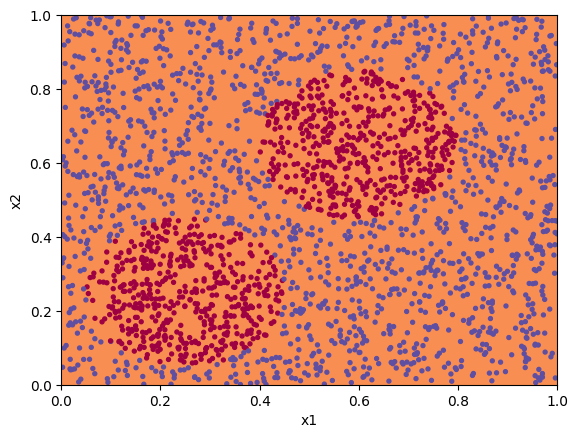

Epoch 1/10:     Accuracy: 0.6141260973663208 Loss: 293.9234473110568


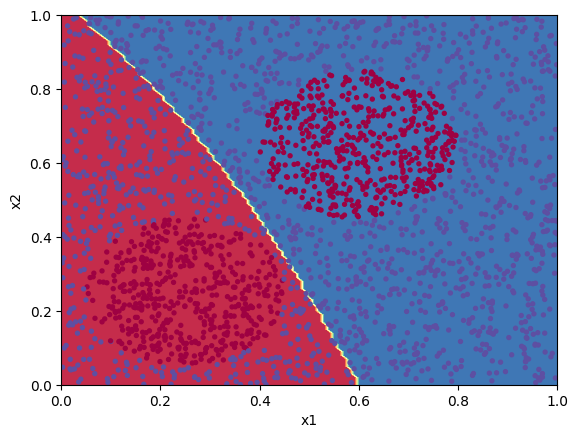

Epoch 2/10:     Accuracy: 0.650438946528332 Loss: 283.00852495517825


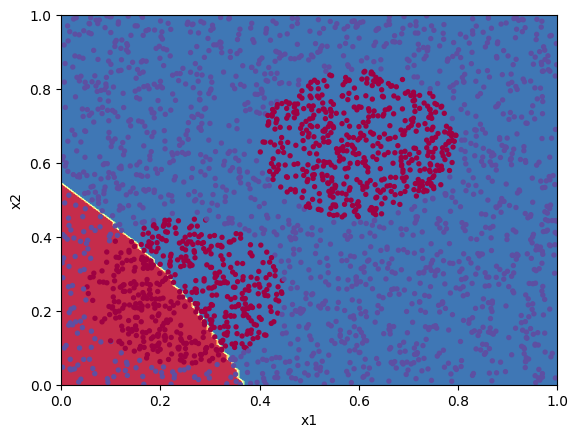

Epoch 3/10:     Accuracy: 0.6133280127693536 Loss: 279.112339552259


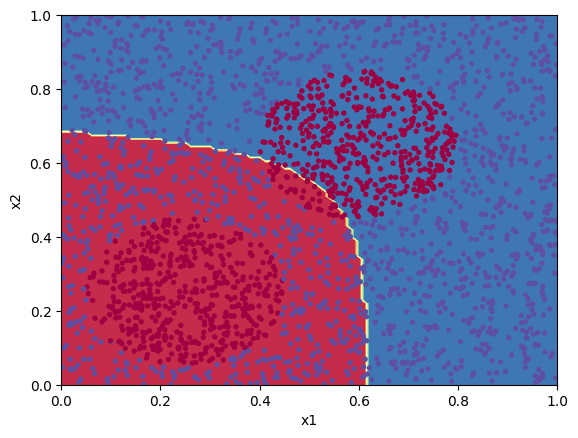

Epoch 4/10:     Accuracy: 0.6049481245011972 Loss: 276.14763836235943


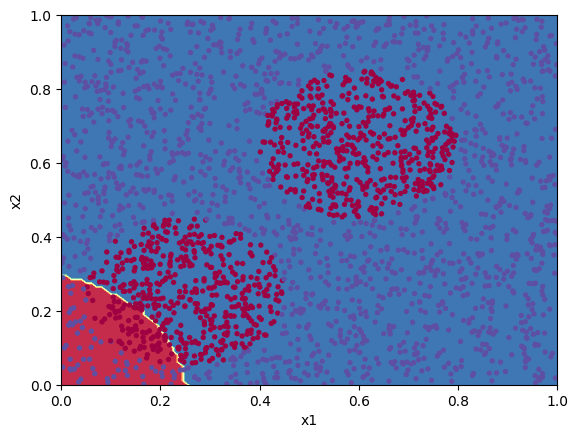

Epoch 5/10:     Accuracy: 0.6636073423782921 Loss: 242.6712239850138


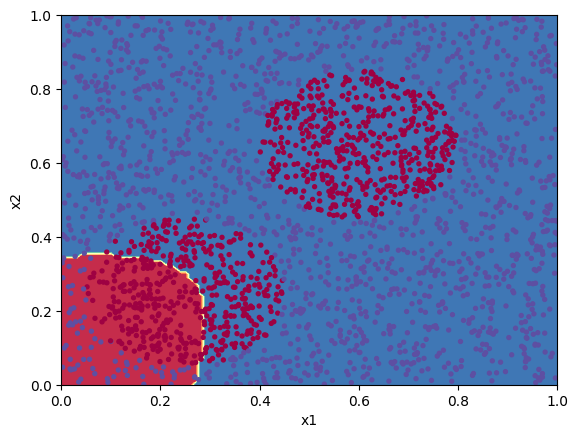

Epoch 6/10:     Accuracy: 0.7382282521947326 Loss: 201.84697184524688


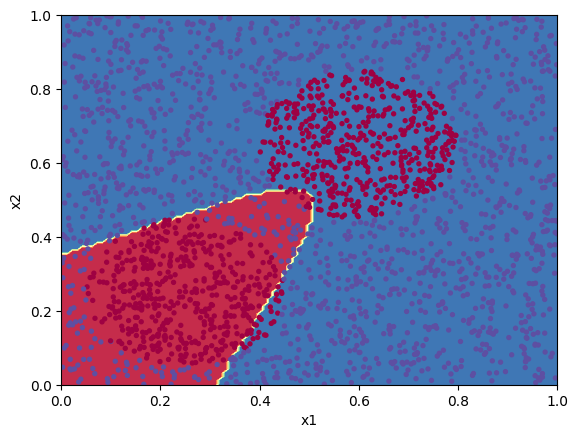

Epoch 7/10:     Accuracy: 0.825219473264166 Loss: 179.094192486221


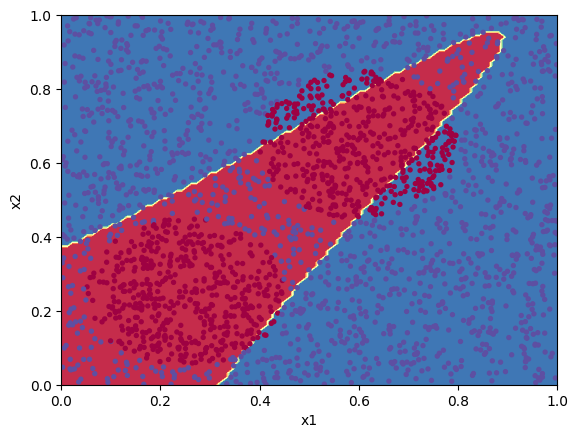

Epoch 8/10:     Accuracy: 0.8264166001596169 Loss: 168.66454137389985


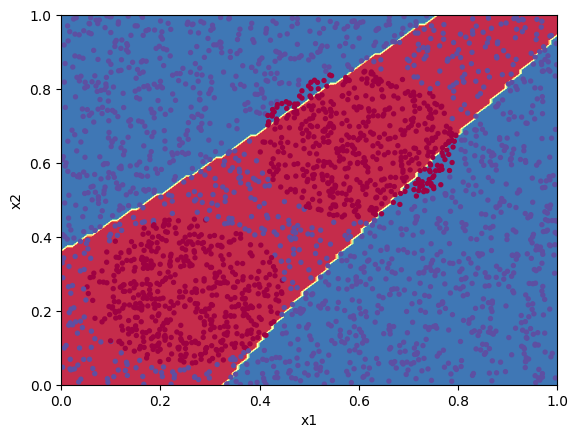

Epoch 9/10:     Accuracy: 0.7960893854748603 Loss: 180.06794794276277


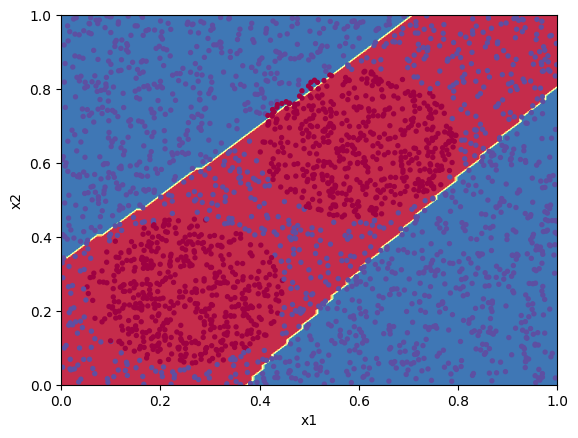

Epoch 10/10:    Accuracy: 0.8180367118914605 Loss: 164.4695729095204


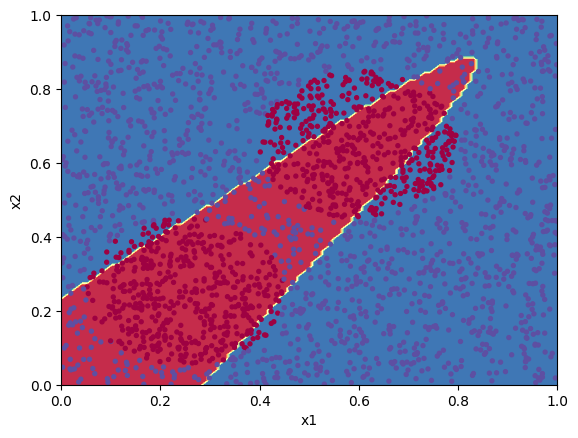

In [7]:
# Train the network and plot its decision boundary
plt.ion()

train(train_set, batch_size=1, epochs=10, eta=0.2, validation_set=train_set)

plot_decision_boundary(X, Y)
plt.show()